```
Лабораторная работа 3

Базовые алгоритмы обучения без учителя и работа с текстовыми данными

1. Понижение размерности и визуализация данных
Примените методы снижения размерности sklearn.decomposition.PCA и
sklearn.manifold.TSNE для визуализации данных с которым вы работали в лабораторной
No 2 (снижая размерность до двух). Отобразите полученные результаты
2. Кластерный анализ
1) С помощью алгоритма k-means сделайте квантование изображения (удаление
визуально избыточной информации) с глубиной 64, 32, 16 и 8 уровней. Изображение
выбираете произвольно.
Пример: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
2) Сгенерируйте набор синтетических данных (точек на плоскости), например при помощи
sklearn.datasets.make_blobs, число центров N (от 3 до 5) выберите произвольно.
Постройте силуэтные графики для Kmeans (для числа кластеров N-1, N, N+1), объясните
результаты
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
3) Сгенерируйте набор синтетических данных в виде смеси двух гауссиан, для этого

воспользуйтесь функцией: https://docs.scipy.org/doc/numpy-
1.13.0/reference/generated/numpy.random.multivariate_normal.html

(примените ее дважды с разными mean и cov), результат объедините в одно множество.
Разделите смесь с помощью EM алгоритма(sklearn.mixture.GaussianMixture), обратите
внимание на параметр covariance_type. С помощью атрибутов weights_ и covariances_
восстановите их значения (сравните с оригинальными). Визуализируйте результат.
3. Обработка текстовых данных
Загрузите набор текстовых данных, снабженных метками классов. Проведите
предобработку данных (удалите стоп-слова, пунктуацию, проведите нормализацию),
постройте визуализацию наиболее частых слов или n-gram в каждом классе (wordcloud),
извлеките признаки (например sklearn.feature_extraction.text .TfidfVectorizer; или
sklearn.decomposition.TruncatedSVD )
Проведите классификацию текстовых данных, сделайте оценку качества
Текстовые данные для анализа можно брать здесь:
https://lionbridge.ai/datasets/the-best-25-datasets-for-natural-language-processing/
или из любого другого источника по вашему выбору
(в случае данных с множеством классов достаточно взять 2-3 класса )

```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("bird.csv")
df = df.fillna(df.mean())
df = df.drop(columns=['id'])
feature_columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw'] # numeric feature columns.

In [3]:
df

huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0    80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1    88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2    79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3    77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4    62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW
..     ...   ...    ...    ...    ...   ...    ...   ...    ...   ...  ...
415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   SO
416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   SO
417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   SO
418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   SO
419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   SO

[420 rows x 11 columns]

## 1. Понижение размерности и визуализация данных

In [4]:
X = df[feature_columns]
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)
X_tsne = TSNE(n_components=2).fit_transform(X)


In [5]:
X_pca[:5], X_tsne[:5]

(array([[ -9.5996294 , -42.92432869],
        [ 30.35796145,   4.4073199 ],
        [ 14.4234915 ,   5.17363284],
        [  7.31717059,   0.94428059],
        [-17.3073988 ,  -2.33259163]]),
 array([[ 3.2527075, -5.292173 ],
        [11.705153 , -7.7523074],
        [10.485116 , -6.274853 ],
        [ 9.539461 , -5.8009505],
        [ 3.1982124, -0.7247857]], dtype=float32))

In [6]:
labels_pca = {
            str(i): f"PC {i+1} ({var:.1f}%)" 
            for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels_tsne = {'0': 'TS 1', '1': 'TS 2'}
fig1 = px.scatter_matrix(X_pca, labels=labels_pca, dimensions=range(2), color=df['type'], title = 'PCA')
fig2 = px.scatter_matrix(X_tsne, labels=labels_tsne, dimensions=range(2), color=df['type'], title = 'TSNE')
fig1.show()
fig2.show()

## 2. Кластерный анализ

```
1) С помощью алгоритма k-means сделайте квантование изображения (удаление
визуально избыточной информации) с глубиной 64, 32, 16 и 8 уровней. Изображение
выбираете произвольно.
```

In [7]:
from skimage import data
image = data.chelsea()

In [8]:
def color_quantization_k_means(image, n_colors):
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    labels = kmeans.predict(image_array)



    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image
    
    # Display all results, alongside original image
    plt.figure(1)
    plt.clf()
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(image)

    plt.figure(2)
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image ({n_colors} colors, K-Means)'  )
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    

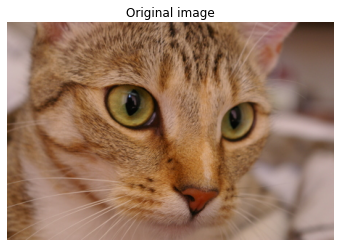

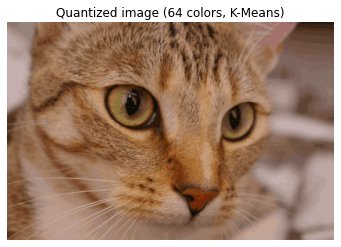

In [9]:
color_quantization_k_means(image, n_colors=64)

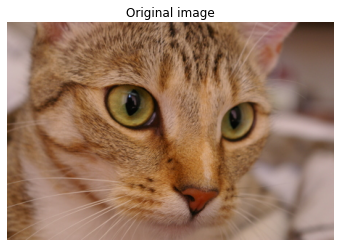

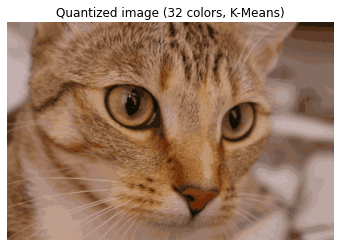

In [10]:
color_quantization_k_means(image, n_colors=32)

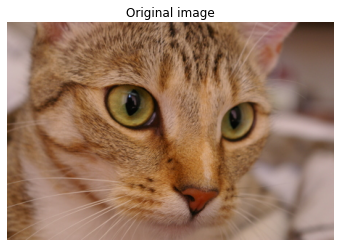

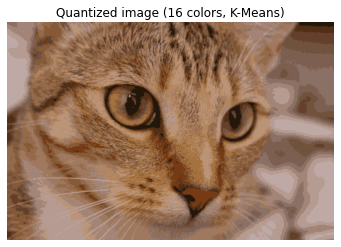

In [11]:
color_quantization_k_means(image, n_colors=16)

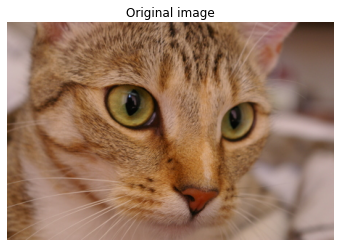

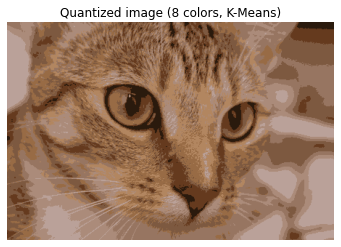

In [12]:
color_quantization_k_means(image, n_colors=8)

```
2) Сгенерируйте набор синтетических данных (точек на плоскости), например при помощи
sklearn.datasets.make_blobs, число центров N (от 3 до 5) выберите произвольно.
Постройте силуэтные графики для Kmeans (для числа кластеров N-1, N, N+1), объясните
результаты
```

In [13]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)
X.shape

(500, 2)

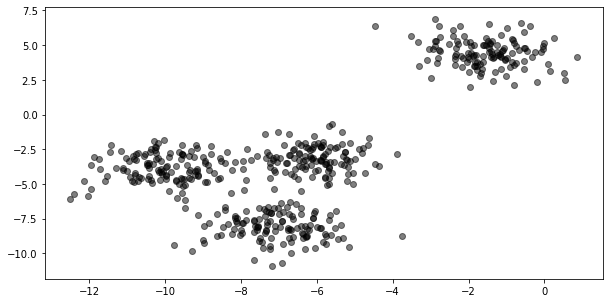

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

In [15]:
range_n_clusters = [6,7, 8]

For n_clusters = 6 The average silhouette_score is : 0.4387644975296138
For n_clusters = 7 The average silhouette_score is : 0.3728615111052894
For n_clusters = 8 The average silhouette_score is : 0.32799178719839805


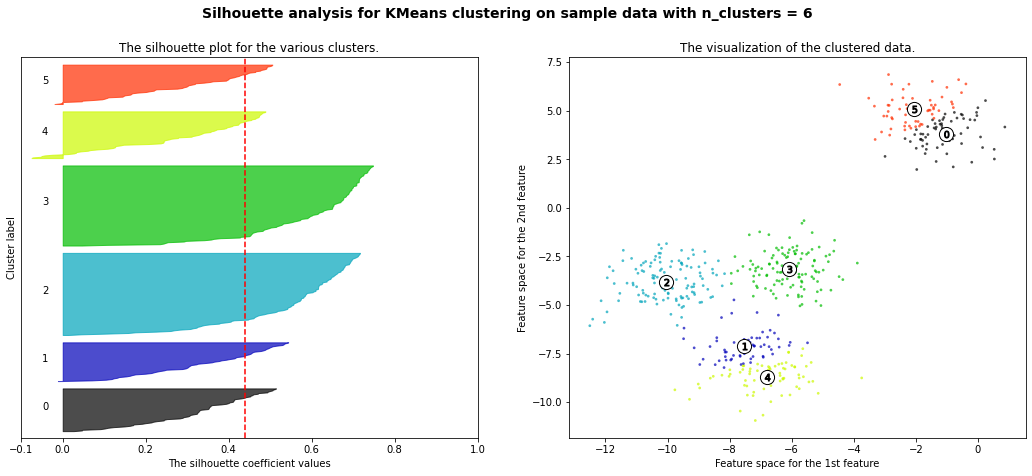

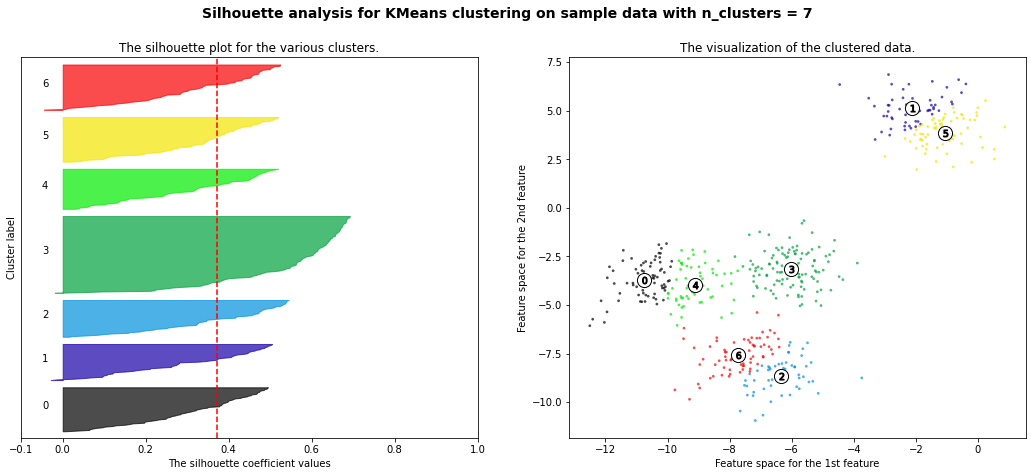

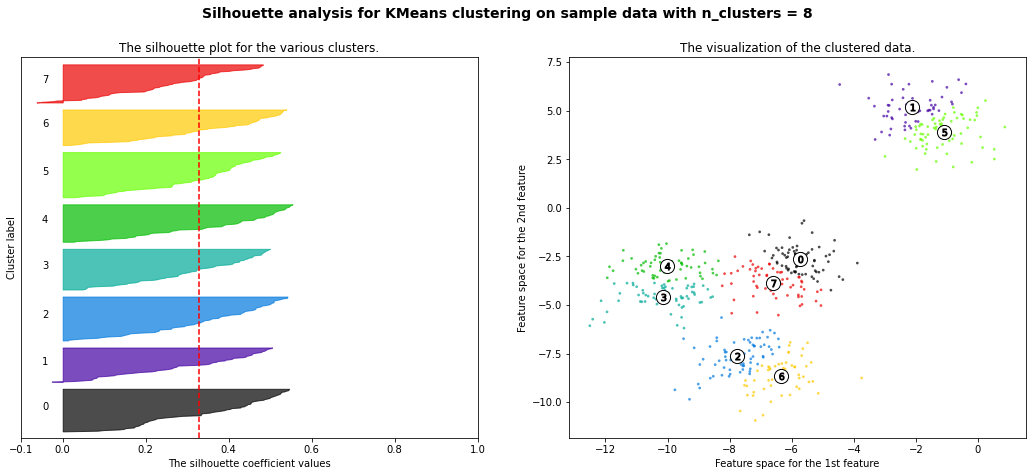

In [16]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    #silhouette_score считается по формуле (b - a)/max(a, b), где a - усредненнное расстояние
    #внутри кластера, а b - усредненное расстояние до следующего кластера. Лучшее значение +1, худшеее -1
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #silhouette_samples считает silhouette_score для каждого семпла и показывает насколько семпл
    #хорошо кластеризирован
    
    y_lower = 10
    for i in range(n_clusters):
        #Аггрериуем значения silhouette_score по номеру кластера и сортируем
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Подписываем графики с silhouette_score номерами кластеров
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Среднее значение silhouette_score на всех кластерах
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Как на самом деле разбились кластера
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Подписываем кластера
    centers = clusterer.cluster_centers_
    # Рисуем кружочки
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

```
3) Сгенерируйте набор синтетических данных в виде смеси двух гауссиан, для этого
воспользуйтесь функцией: https://docs.scipy.org/doc/numpy-
1.13.0/reference/generated/numpy.random.multivariate_normal.html

(примените ее дважды с разными mean и cov), результат объедините в одно множество.
Разделите смесь с помощью EM алгоритма(sklearn.mixture.GaussianMixture), обратите
внимание на параметр covariance_type. С помощью атрибутов weights_ и covariances_
восстановите их значения (сравните с оригинальными). Визуализируйте результат.
```

In [17]:
mean1 = (2, 3)
cov1 = [[1, 0], [0, 1]]
X1 = multivariate_normal(mean1, cov1, 200)

mean2 = (5, 6)
cov2 = [[2, 0], [0, 2]]
X2 = multivariate_normal(mean2, cov2, 200)
X = np.concatenate([X1, X2])

In [18]:
X.shape

(400, 2)

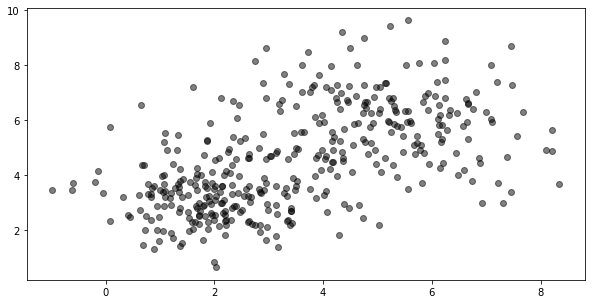

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

In [20]:
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)

GaussianMixture(n_components=2)

In [21]:
clf.means_, clf.weights_, clf.covariances_

(array([[2.04865608, 3.24629666],
        [5.0867385 , 5.99644644]]),
 array([0.52369818, 0.47630182]),
 array([[[ 1.10542715,  0.02075488],
         [ 0.02075488,  1.00403345]],
 
        [[ 1.92171157, -0.27782937],
         [-0.27782937,  1.84530583]]]))

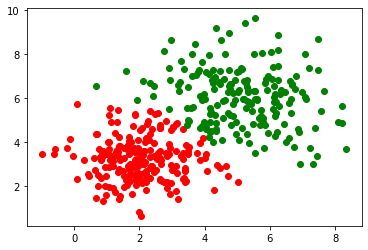

In [22]:
predicted = clf.predict(X)
for k in range(0,2):
    data = X[predicted==k]
    plt.scatter(data[:,0],data[:,1],c=['red','green'][k])
plt.show()

## 3. Обработка текстовых данных

In [23]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [24]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer( token_pattern=r'(?u)\b[a-zA-Z]\w+\b',
                              ngram_range=(1, 2),
                              stop_words='english' )
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 1065618)

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 1065618)

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [28]:
clf.score(X_train_counts, twenty_train.target)

0.9621707618879265

In [29]:
from wordcloud import WordCloud,STOPWORDS

wc=WordCloud(width =1000, height=1000,stopwords=STOPWORDS)
text = ' '.join(count_vect.get_feature_names())

embed_code=wc.generate(text=text)

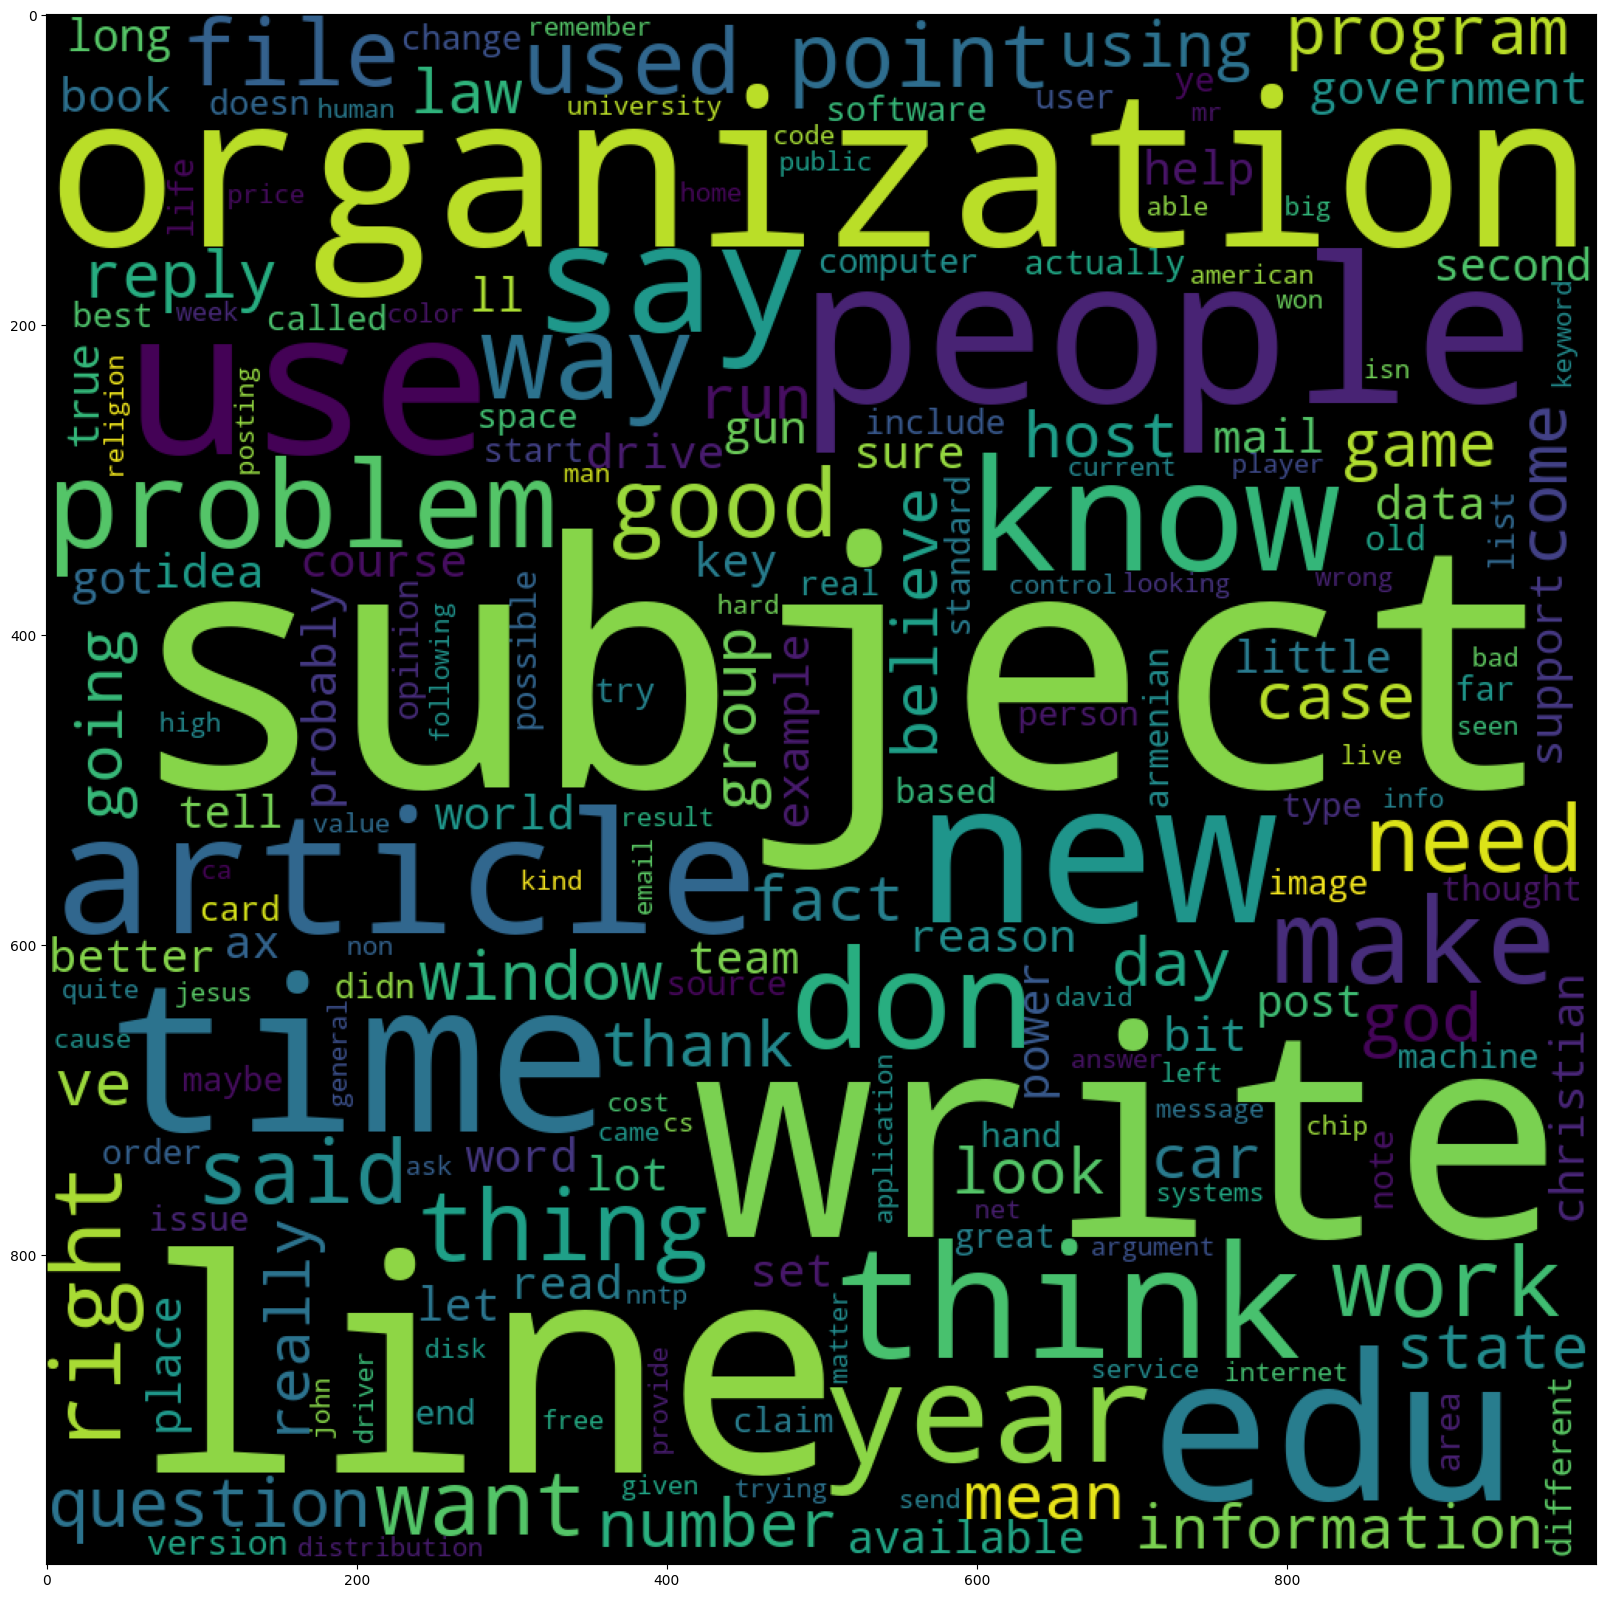

In [30]:
plt.figure(figsize=(20,45), dpi =100)
plt.imshow(embed_code)